# Cách chọn model
(https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)


# Project: Titanic


In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
train_df = pd.read_csv('./Data/train.csv')
test_df = pd.read_csv('./Data/test.csv')

In [91]:
train_df.shape

(891, 12)

In [92]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* ` SibSp `: siblings / spouses aboard the Titanic
* `Parch`: parents / children aboard the Titanic
* `Ticket`: Ticket number
* `Cabin`: Cabin number
* `Pclass`: hạng của chỗ ngồi

In [93]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [94]:
train_df.set_index(train_df.PassengerId, inplace = True )

In [95]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [96]:
train_df.drop(columns = 'PassengerId', inplace = True)

In [97]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [98]:
test_df = pd.read_csv('./Data/test.csv', index_col = 'PassengerId')

In [99]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [100]:
set(train_df['Parch'])

{0, 1, 2, 3, 4, 5, 6}

### Chuyển đổi dữ liệu về dạng nhóm 


In [101]:
train_df['Survived'] = train_df['Survived'].astype('category')

In [102]:
features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
def convert_cat(df, features):
    for feature in features:
        df[feature] = df[feature].astype('category')
convert_cat(train_df, features)
convert_cat(test_df, features)

In [103]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


In [104]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [105]:
train_df.describe(include = 'category')

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


* Categotical: Survived, Sex, Embarked, Pclass, SibSp, Parch
    * Embarked: C, Q, S
* Numerical: Age, Fare
* Mix types of data: Ticket, Cabin
* Contain Error/Type: Name
* Blank or Null: Cabin > Age > Embarked
* Various Data Type: String, Int, Float

# 3. Exploratory Data Analysis (EDA)

* 1. how many people survived?

In [106]:
train_df['Survived'].value_counts(normalize = True).to_frame()*100

,Survived
0,61.616162
1,38.383838


In [107]:
train_df['Sex'].value_counts(normalize = True).to_frame()*100

,Sex
male,64.758698
female,35.241302


# Survival rate by sex

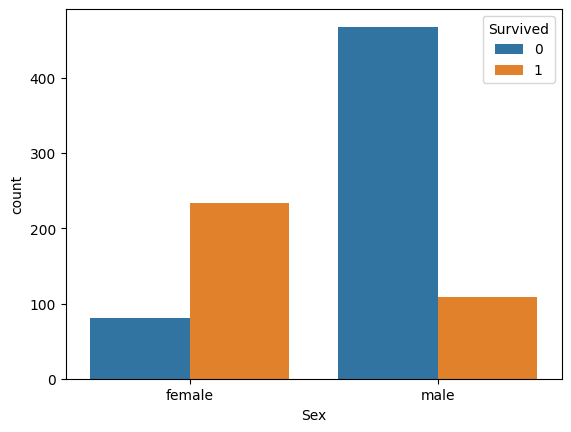

In [108]:
sns.countplot(data = train_df, hue = 'Survived', x = 'Sex');

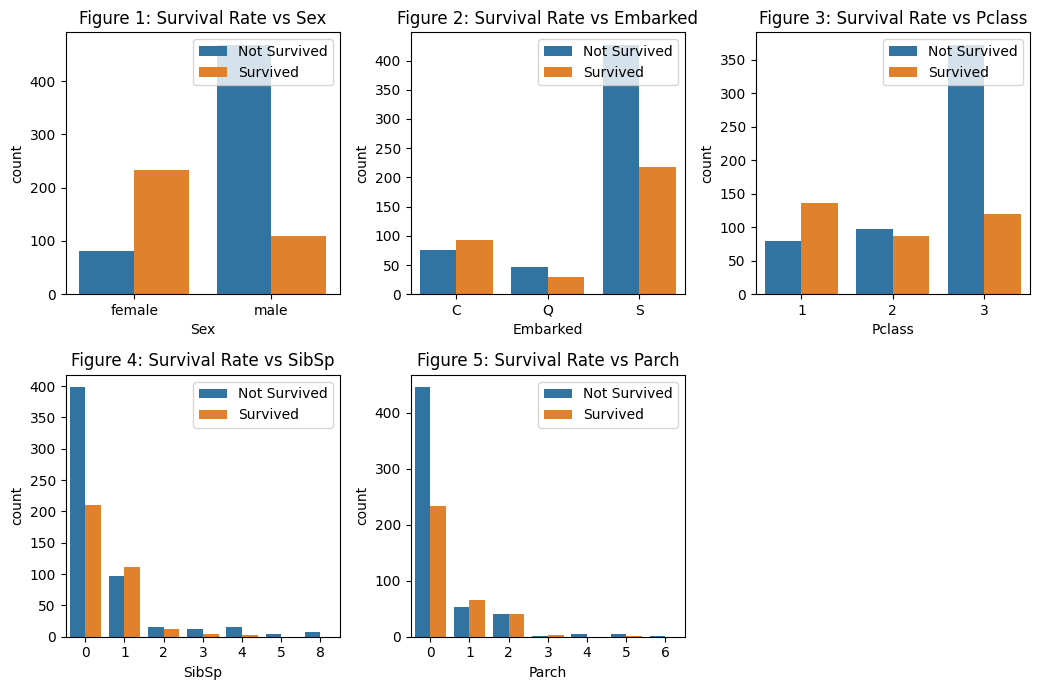

In [109]:
cols = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']
n_rows = 2
n_cols = 3
fig, ax = plt.subplots(n_rows, n_cols, figsize = (n_cols*3.5, n_rows*3.5))
for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c #index
        if i <len(cols):
            ax_i = ax[r,c]
            sns.countplot(data = train_df, x = cols[i], hue = 'Survived', ax = ax_i)
            ax_i.set_title(f'Figure {i+1}: Survival Rate vs {cols[i]}')
            ax_i.legend(title = '', loc = 'upper right', labels = ['Not Survived', 'Survived'])
ax.flat[-1].set_visible(False) # Xóa bảng
plt.tight_layout()

# EDA for Numerical Features
* `Age`, `Fare`

# Age

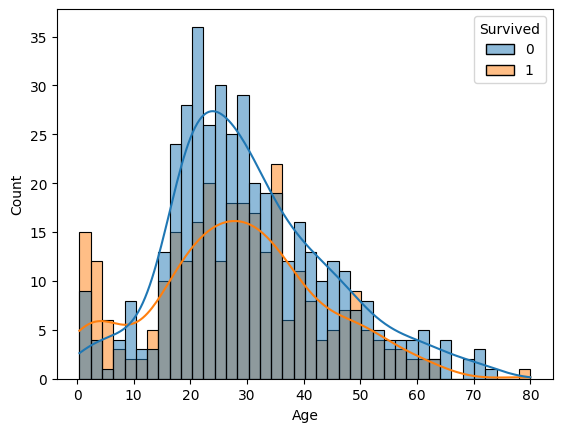

In [110]:
sns.histplot(data = train_df, x = "Age",hue = 'Survived', bins = 40, kde = True);

<Axes: xlabel='Fare', ylabel='Count'>

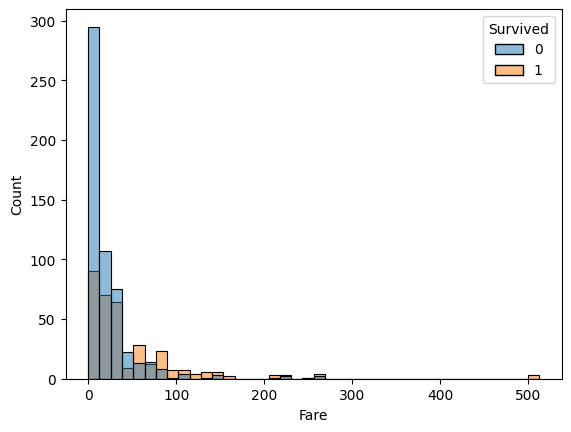

In [111]:
sns.histplot(data = train_df, x = 'Fare', hue = 'Survived', bins = 40)

# Cắt giá vé ra thành 4 khoảng


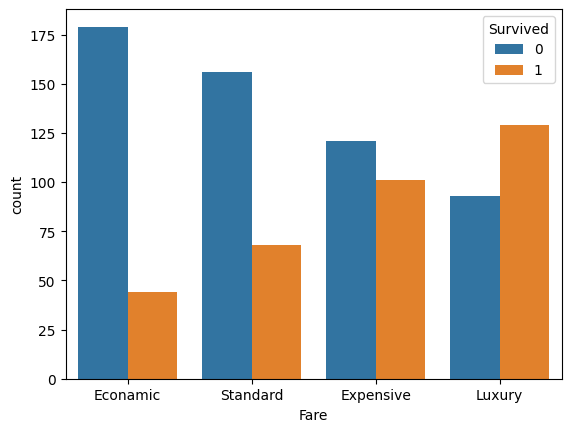

In [112]:
# to name for 0-25 quartile, 25-50, 50-5, 75-100
fare_categories = ['Econamic', 'Standard', 'Expensive', 'Luxury']
quanrtitle_data = pd.qcut(train_df['Fare'], 4, labels = fare_categories)
sns.countplot(x = quanrtitle_data, hue = train_df['Survived']);

# 4. Feature Engineering & Data Wrangling

In [113]:
train_df['Name'].tail()

PassengerId
887                       Montvila, Rev. Juozas
888                Graham, Miss. Margaret Edith
889    Johnston, Miss. Catherine Helen "Carrie"
890                       Behr, Mr. Karl Howell
891                         Dooley, Mr. Patrick
Name: Name, dtype: object

In [114]:
import re
def extract_title(name):
    p = re.compile(r',([\w\s]+)\.')
    return p.search(name).groups(1)[0].strip()
train_df['Title'] = train_df['Name'].apply(lambda name: extract_title(name))

In [115]:
train_df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [116]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [117]:
test_df['Title'] = test_df['Name'].apply(lambda name: extract_title(name))

In [118]:
test_df['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [119]:
# C1
title = ['Mr', 'Miss', 'Mrs', 'Master']
train_df['Title'].apply(lambda x: x if x in title else 'Others')

PassengerId
1          Mr
2         Mrs
3        Miss
4         Mrs
5          Mr
        ...  
887    Others
888      Miss
889      Miss
890        Mr
891        Mr
Name: Title, Length: 891, dtype: object

In [120]:
# c2
titles = ['Mr', 'Miss', 'Mrs', 'Master']
def group_title(title):
    if title in titles:
        return title
    elif title == 'Ms':
        return "Miss"
    else:
        return 'Others'
train_df['Title'] = train_df['Title'].apply(lambda x: group_title(x))

In [121]:
train_df['Title'].value_counts()

Mr        517
Miss      183
Mrs       125
Master     40
Others     26
Name: Title, dtype: int64

In [122]:
test_df['Title'] = test_df['Title'].apply(lambda x: group_title(x))

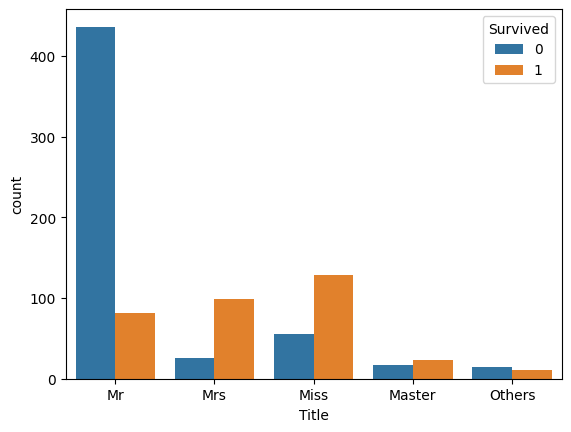

In [123]:
sns.countplot(data = train_df, x = 'Title', hue = 'Survived');

# Family
* `Sibsp`, `Parch`

In [124]:
train_df['Family_Size'] = train_df['SibSp'].astype('int') + train_df['Parch'].astype('int') + 1

In [125]:
test_df['Family_Size'] = test_df['SibSp'].astype('int') + test_df['Parch'].astype('int') + 1

In [126]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1


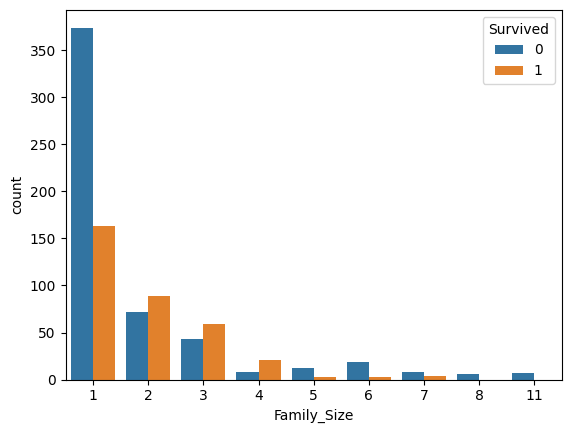

In [127]:
sns.countplot(data = train_df, x = 'Family_Size', hue = 'Survived');

In [128]:
train_df['Family_Cat'] = pd.cut(train_df['Family_Size'], bins = [0,1,4,6, 20], labels = ['Solo', 'Small', 'medium', 'Large']) # (0,1], (1,4], (4,6], (6,20]
test_df['Family_Cat'] = pd.cut(test_df['Family_Size'], bins = [0,1,4,6, 20], labels = ['Solo', 'Small', 'medium', 'Large']) # (0,1], (1,4], (4,6], (6,20]

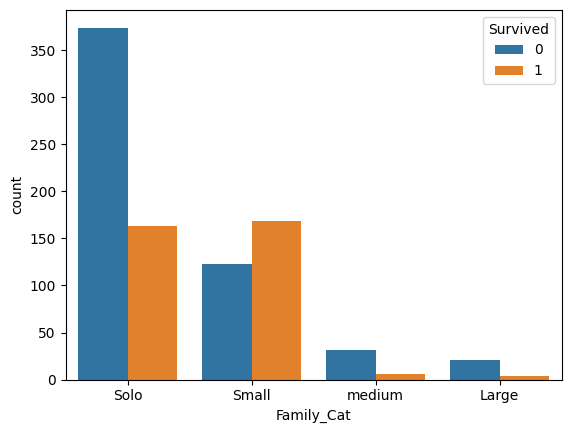

In [129]:
sns.countplot(data = train_df, x = 'Family_Cat', hue = 'Survived');

# 4.2 Data Wrangling

In [130]:
num_features = ['Age', 'Fare']
cat_features = ['Sex', 'Pclass', "Embarked", "Title", 'Family_Cat']
feature_clos = num_features + cat_features
print(feature_clos)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']


In [131]:
def display_missing(df, feature_cols):
    n_rows = train_df.shape[0]
    for col in feature_cols:
        missing_count = df[col].isna().sum()
        if missing_count>0:
            print(f'Col {col} has {missing_count/n_rows *100:.2f}% missing vales.')
display_missing(train_df, feature_clos)
display_missing(test_df, feature_clos)

Col Age has 19.87% missing vales.
Col Embarked has 0.22% missing vales.
Col Age has 9.65% missing vales.
Col Fare has 0.11% missing vales.


In [132]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size,Family_Cat
PassengerId,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,1,Solo
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,2,Small
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,1,Solo
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,1,Solo
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,3,Small


# Filling missing values

In [133]:
age_by_sex_pclass = train_df.groupby(['Sex', 'Pclass']).median()['Age']
age_by_sex_pclass

C:\Users\Admin\AppData\Local\Temp\ipykernel_5832\1121100101.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  age_by_sex_pclass = train_df.groupby(['Sex', 'Pclass']).median()['Age']


Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [134]:
# filling the missing values in Age with medians

train_df['Age'] = train_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
test_df['Age'] = test_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

C:\Users\Admin\AppData\Local\Temp\ipykernel_5832\633699115.py:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  train_df['Age'] = train_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
C:\Users\Admin\AppData\Local\Temp\ipykernel_5832\633699115.py:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby

# Tạo data_frame để train model 

In [135]:
X = train_df[feature_clos]
y = train_df['Survived']

In [136]:
X_test = test_df[feature_clos]

In [137]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [138]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [139]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_Cat'])])

In [140]:
X = preprocessor.transform(X)

In [141]:
X_test = preprocessor.transform(X_test)

# 5. Model Training

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [144]:
X_train.shape, X_val.shape

((712, 19), (179, 19))

In [145]:
X_test.shape

(418, 19)

In [165]:
# binary classification
from sklearn.linear_model import LogisticRegression # mô hình logistic regression
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures # tăng bậc của phương trình dự đoán
from sklearn.tree import DecisionTreeClassifier

### 1. `from sklearn.metrics import precision_score, recall_score`
* Dùng để đánh giá và đo hiệu suất của mô hình máy học 
  * `precision_score`: Precision = (Số lượng True Positives) / (Số lượng True Positives + Số lượng False Positives)
  * `recall_score` : Recall = (Số lượng True Positives) / (Số lượng True Positives + Số lượng False Negatives)

In [147]:
log_reg = LogisticRegression(solver = 'liblinear', max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [148]:
# Độ chính xác (Accuracy) = (Số lượng mẫu được dự đoán đúng) / (Tổng số mẫu trong tập kiểm tra)
log_reg.score(X_val, y_val) # đo độ chính xác của mô hình vs tập dữ liệu kiểm tra


0.8435754189944135

In [149]:
y_pred = log_reg.predict(X_val)

In [150]:
# so sánh giữa giá trị dự đoán và giá trị thực 
precision_score(y_val, y_pred), recall_score(y_val, y_pred)

(0.7647058823529411, 0.8125)

In [151]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88       115
           1       0.76      0.81      0.79        64

    accuracy                           0.84       179
   macro avg       0.83      0.84      0.83       179
weighted avg       0.85      0.84      0.84       179



- leaner model dự đoán vs pt 
    * y = a*x1 + b*x2 + b (chúng ta sẽ chuyển thành đa thức)
    * y = a*x1^2 + b*x2^2 + c*x3^2 + b

__hello__ Chí Phước
$hello$
> Text that will be indented when the Markdown is rendered.
1. Numbered item
1. Numbered item

<b> In đậm <b>
    <div class="alert alert-block alert-warning">
<b>Example:</b> Use yellow boxes for examples that are not 
inside code cells, or use for mathematical formulas if needed.
</div>
 
<div class="alert alert-block alert-success">
<b>Up to you:</b> Use green boxes sparingly, and only for some specific 
purpose that the other boxes can't cover. For example, if you have a lot 
of related content to link to, maybe you decide to use green boxes for 
related links from each section of a notebook.
</div>
    <div class="alert alert-block alert-danger">
<b>Just don't:</b> In general, avoid the red boxes. These should only be
used for actions that might cause data loss or another major issue.
</div>
   

1. `fit_transform` dùng khi bạn muốn học cách biến đổi từ tập dữ liệu đào tạo và **biến đổi nó** , 
1. `transform` được sử dụng khi bạn muốn sử dụng cùng một quy tắc biến đổi đã học cho các tập dữ liệu khác mà bạn muốn đưa vào sau đó.

In [162]:
poly = PolynomialFeatures(degree = 5)
poly_features_X_train = poly.fit_transform(X_train) # tập data đã đc biến đổi
poly_features_X_val = poly.transform(X_val)

In [163]:
poly_log_reg = LogisticRegression(solver = 'liblinear', max_iter= 1000)
poly_log_reg.fit(poly_features_X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [164]:
poly_log_reg.score(poly_features_X_val, y_val)

0.8435754189944135

In [169]:
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=2023)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=2023)

In [170]:
decision_tree.score(X_val, y_val)

0.8324022346368715

> Nếu đến đây mà đánh giá mô hình logistic chạy tốt hơn thì sai!. Vì Hiện tại mô hình mới đg chạy trên <font color="red"> **một tập dữ liệu ngẫu nhiên**  </font> còn nhiều tập ngẫu nhiên khác nữa



# 5.1 <font color =red>Cross-Validation </font>

In [172]:
from sklearn.model_selection import cross_val_score

In [189]:
log_reg_cv = LogisticRegression(solver = 'liblinear', max_iter= 1000)
dt_cv = DecisionTreeClassifier(criterion='entropy', max_depth= 8, random_state=2022)

lr_scores = cross_val_score(log_reg_cv, X, y, scoring='accuracy', cv=5)


### scoring='`accuracy`' một cách đo lường độ chính xác
>Accuracy = (Số lượng dự đoán chính xác) / (Tổng số dự đoán)

In [184]:
lr_scores

array([0.83240223, 0.8258427 , 0.79775281, 0.81460674, 0.85955056])

In [185]:
lr_scores.mean(), lr_scores.std()

(0.826031008725127, 0.020466357172416235)

In [192]:
dt_scores = cross_val_score(dt_cv, X, y, scoring='accuracy', cv=5)
dt_scores.mean(), dt_scores.std()

(0.8047517418868873, 0.021020809535682087)

# 5.2 Baseline model Comparison
* (chưa chỉnh gì cả mới chỉ cho những thông số cơ bản vào )